In [71]:
import sys
sys.path.append("/home/diego/python/spike-train/") 

import matplotlib.pyplot as plt
import numpy as np

from gglm.glm.base import GLM
from kernel.fun import KernelFun
from kernel.rect import KernelRect
from sptr.sptr import SpikeTrain

%load_ext autoreload
%autoreload 2
plt.close('all')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### homogeneous poisson

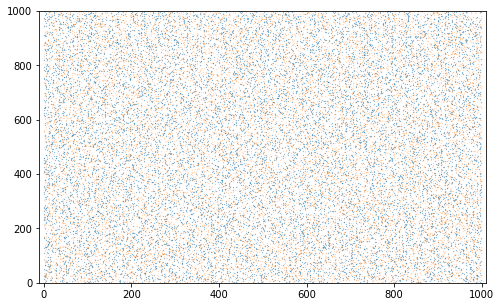

In [40]:
ax = st1.plot(ms=0.2)
st2.plot(ax=ax, ms=0.1, color='C1')

In [49]:
a = SpikeTrain(t, r1)

In [50]:
# a.population_norm(ker, ker, biased=False)

0.4017451377696312

In [81]:
r1.shape

(1000, 1000)

True

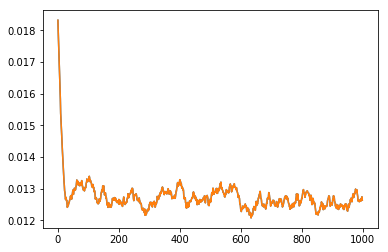

In [91]:
a = SpikeTrain(t, np.mean(r1, 1)[:, None])
plt.figure()
plt.plot(a.average_spike_train().mask)
plt.plot(np.mean(r1, 1))

np.allclose(np.mean(r1, 1)[:, None], a.average_spike_train().mask)

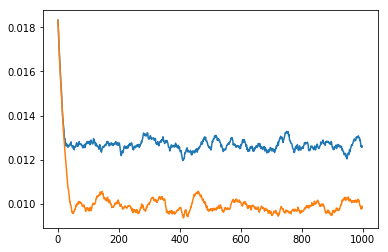

In [65]:
plt.figure()
plt.plot(np.mean(r1, 1))
plt.plot(np.mean(r2, 1))

(array([ 6.,  6., 11., 20., 23., 16., 10.,  3.,  2.,  3.]),
 array([0.00527106, 0.00561654, 0.00596202, 0.00630749, 0.00665297,
        0.00699844, 0.00734392, 0.0076894 , 0.00803487, 0.00838035,
        0.00872583]),
 <a list of 10 Patch objects>)

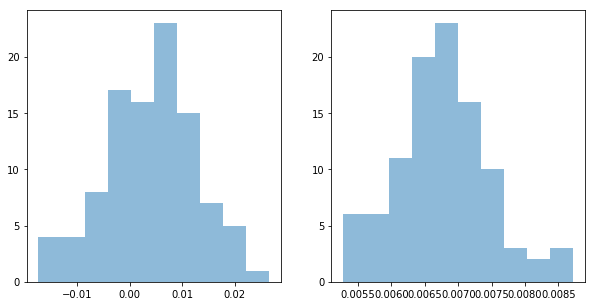

In [128]:
eta1 = KernelFun.exponential([10], coefs=[7])
eta2 = KernelFun.exponential([20], coefs=[7])

dt = 1
t = np.arange(0, 1000, dt)
# ker = KernelFun.gaussian_delta(2)
ker = KernelRect([0, 1], [1])

glm1 = GLM(u0=4, eta=eta1)
u, r1, mask_spikes1 = glm1.sample(t, shape=(100,))
st1 = SpikeTrain(t, mask_spikes1)

glm2 = GLM(u0=4, eta=eta2)
u, r2, mask_spikes2 = glm2.sample(t, shape=(1000,))
st2 = SpikeTrain(t, mask_spikes2)

distance = []
r_distance = []

for ii in range(100):
    idx1 = np.random.choice(st1.nsweeps, size=100, replace=False)
    idx2 = np.random.choice(st2.nsweeps, size=100, replace=False)
    _st1 = SpikeTrain(t, st1.mask[:, idx1])
    _st2 = SpikeTrain(t, st2.mask[:, idx2])
    _r1 = SpikeTrain(t, r1[:, idx1])
    _r2 = SpikeTrain(t, r2[:, idx2])
    
    _norm1 = _st1.population_norm(ker, ker, biased=False)
    _norm2 = _st2.population_norm(ker, ker, biased=False)
    _average_dot = _st1.average_dot(_st2, ker, ker)
    _distance = _norm1**2 + _norm2**2 - 2 * _average_dot
    distance.append(_distance)
    
    _norm1 = _r1.population_norm(ker, ker, biased=False)
    _norm2 = _r2.population_norm(ker, ker, biased=False)
    _average_dot = _r1.average_dot(_r2, ker, ker)
    _distance = _norm1**2 + _norm2**2 - 2 * _average_dot
    r_distance.append(_distance)
    
#     _r1 = _r1.mask.copy()
#     _r2 = _r2.mask.copy()
#     r1_sum = np.sum(_r1, 1)
#     r2_sum = np.sum(_r2, 1)
#     aux = (np.sum(r1_sum**2) - np.sum(_r1**2)) / (_r1.shape[1] * (_r1.shape[1] - 1))
#     print(_norm1**2, aux)
#     print(_average_dot, np.sum(r1_sum * r2_sum, 0) / (_r1.shape[1] * _r2.shape[1]))

fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), ncols=2)
ax1.hist(distance, alpha=0.5)
ax2.hist(r_distance, alpha=0.5)

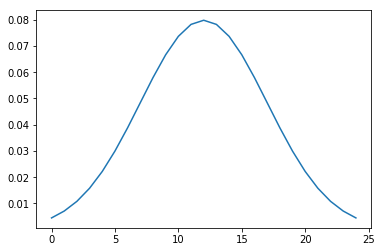

In [119]:
plt.plot(weight)

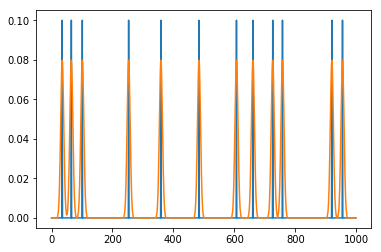

In [136]:
import torch

import torch.nn.functional  as F

weight = torch.from_numpy(KernelFun.gaussian_delta(5).interpolate(np.arange(0, 31, 1) - 15))[None, None, :]
mask = torch.from_numpy(mask_spikes1.T)[:, None, :].double()

aux = F.conv1d(mask, weight, padding=(weight.shape[2] - 1) // 2)

fig, ax = plt.subplots()
ax.plot(mask[0, 0, :] / 10)
ax.plot(aux[0, 0, :])

In [134]:
weight.shape

torch.Size([1, 1, 30])

In [123]:
mask = torch.from_numpy(mask_spikes1)mask.shape

SyntaxError: invalid syntax (<ipython-input-123-063e1ec7c3c7>, line 1)

In [28]:
np.random.choice(st1.nsweeps, size=100, replace=False)

array([436,  54, 822, 478, 963, 794, 814, 972, 845, 121, 915, 511,  47,
       622, 906, 294, 289, 219, 796, 502, 346, 606, 271, 989, 734, 481,
        93, 500, 924, 598, 329, 392, 465, 420, 333, 499, 134, 954, 497,
       106, 828,   0, 938, 407, 183, 865, 345, 829, 672, 112, 408, 807,
       515, 236, 818, 795, 605, 355, 347,  30, 696, 457, 731, 390, 356,
       127, 452, 695, 402, 530, 775, 221, 850,  43,   6, 226,  10,  81,
       450, 424, 713, 751,  17,  66, 806, 716, 547, 178, 952, 864, 412,
       161, 334, 771, 712, 669, 237, 370, 238, 416])